In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [240]:
pwd

'C:\\Users\\general\\Desktop\\sales'

In [241]:
df=pd.read_excel(r"C:\Users\general\Desktop\sales\forecasting Sales of Store using IBM Watson Studio.xlsx")

In [242]:
df

,HQ,Country,State_of_outlet,City_of_outlet,Month,Day,Year,Total_Sales
0,Asia,India,NaN,Bombay (Mumbai),1,1,2005,72.2
1,Asia,India,NaN,Bombay (Mumbai),1,2,2005,72.7
2,Asia,India,NaN,Bombay (Mumbai),1,3,2005,74.3
3,Asia,India,NaN,Bombay (Mumbai),1,4,2005,78.9
4,Asia,India,NaN,Bombay (Mumbai),1,5,2005,81.5
...,...,...,...,...,...,...,...,...
17531,Asia,India,NaN,Delhi,12,27,2016,61.3
17532,Asia,India,NaN,Delhi,12,28,2016,61.7
17533,Asia,India,NaN,Delhi,12,29,2016,59.3
17534,Asia,India,NaN,Delhi,12,30,2016,57.1


In [243]:
df.head()

,HQ,Country,State_of_outlet,City_of_outlet,Month,Day,Year,Total_Sales
0,Asia,India,NaN,Bombay (Mumbai),1,1,2005,72.2
1,Asia,India,NaN,Bombay (Mumbai),1,2,2005,72.7
2,Asia,India,NaN,Bombay (Mumbai),1,3,2005,74.3
3,Asia,India,NaN,Bombay (Mumbai),1,4,2005,78.9
4,Asia,India,NaN,Bombay (Mumbai),1,5,2005,81.5


In [244]:
df.tail()

,HQ,Country,State_of_outlet,City_of_outlet,Month,Day,Year,Total_Sales
17531,Asia,India,NaN,Delhi,12,27,2016,61.3
17532,Asia,India,NaN,Delhi,12,28,2016,61.7
17533,Asia,India,NaN,Delhi,12,29,2016,59.3
17534,Asia,India,NaN,Delhi,12,30,2016,57.1
17535,Asia,India,NaN,Delhi,12,31,2016,58.3


In [245]:
df.describe()

,State_of_outlet,Month,Day,Year,Total_Sales
count,0.0,17536.000000,17536.000000,17536.000000,17536.000000
mean,NaN,6.524179,15.732892,2010.502053,80.117963
std,NaN,3.449400,8.801978,3.452525,13.315486
min,NaN,1.000000,1.000000,2005.000000,-99.000000
25%,NaN,4.000000,8.000000,2008.000000,77.500000
50%,NaN,7.000000,16.000000,2011.000000,82.600000
75%,NaN,10.000000,23.000000,2014.000000,86.100000
max,NaN,12.000000,31.000000,2016.000000,102.500000


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17536 entries, 0 to 17535
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HQ               17536 non-null  object 
 1   Country          17536 non-null  object 
 2   State_of_outlet  0 non-null      float64
 3   City_of_outlet   17536 non-null  object 
 4   Month            17536 non-null  int64  
 5   Day              17536 non-null  int64  
 6   Year             17536 non-null  int64  
 7   Total_Sales      17536 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.1+ MB


In [247]:
from datetime import datetime
df['Date'] = df.apply(lambda row: datetime.strptime(f"{int(row.Year)}-{int(row.Month)}-{int(row.Day)}", '%Y-%m-%d'), axis=1)

In [248]:
df['Date'].min(),df['Date'].max()

(Timestamp('2005-01-01 00:00:00'), Timestamp('2016-12-31 00:00:00'))

In [249]:
cols=['Month','Day','Year','City_of_outlet','State_of_outlet','Country','HQ']
df.drop(cols,axis=1,inplace=True)
df=df.sort_values('Date')

In [250]:
df.nunique()

Total_Sales     539
Date           4383
dtype: int64

In [251]:
df

,Total_Sales,Date
0,72.2,2005-01-01
730,75.8,2005-01-01
1095,61.0,2005-01-01
365,66.5,2005-01-01
1,72.7,2005-01-02
...,...,...
16802,67.4,2016-12-30
17169,76.8,2016-12-31
16437,79.7,2016-12-31
16803,67.1,2016-12-31


In [252]:
df.isnull().any()

Total_Sales    False
Date           False
dtype: bool

In [253]:
df.shape

(17536, 2)

In [254]:
df=df.groupby('Date')['Total_Sales'].sum().reset_index()

In [255]:
df

,Date,Total_Sales
0,2005-01-01,275.5
1,2005-01-02,275.5
2,2005-01-03,278.6
3,2005-01-04,279.3
4,2005-01-05,281.4
...,...,...
4378,2016-12-27,288.4
4379,2016-12-28,283.3
4380,2016-12-29,281.7
4381,2016-12-30,282.0


In [256]:
Sales_y=df.set_index('Date')

In [257]:
Sales_y.index

DatetimeIndex(['2005-01-01', '2005-01-02', '2005-01-03', '2005-01-04',
               '2005-01-05', '2005-01-06', '2005-01-07', '2005-01-08',
               '2005-01-09', '2005-01-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [258]:
Sales_y

,Total_Sales
Date,
2005-01-01,275.5
2005-01-02,275.5
2005-01-03,278.6
2005-01-04,279.3
2005-01-05,281.4
...,...
2016-12-27,288.4
2016-12-28,283.3
2016-12-29,281.7


In [259]:
Sales=Sales_y.copy()

In [260]:
Sales_y.shape

(4383, 1)

In [261]:
import tensorflow as tf

In [262]:
tf.__version__

'2.3.0'

In [263]:
import keras

In [264]:
keras.__version__

'2.4.3'

In [265]:
y = Sales_y['Total_Sales'].resample('MS').mean()

In [266]:
y

Date
2005-01-01    275.774194
2005-02-01    295.957143
2005-03-01    318.919355
2005-04-01    335.376667
2005-05-01    350.000000
                 ...    
2016-08-01    342.080645
2016-09-01    333.050000
2016-10-01    333.858065
2016-11-01    286.790000
2016-12-01    290.380645
Freq: MS, Name: Total_Sales, Length: 144, dtype: float64

In [267]:
monthly_sales=Sales_y['Total_Sales'].resample('MS').mean()

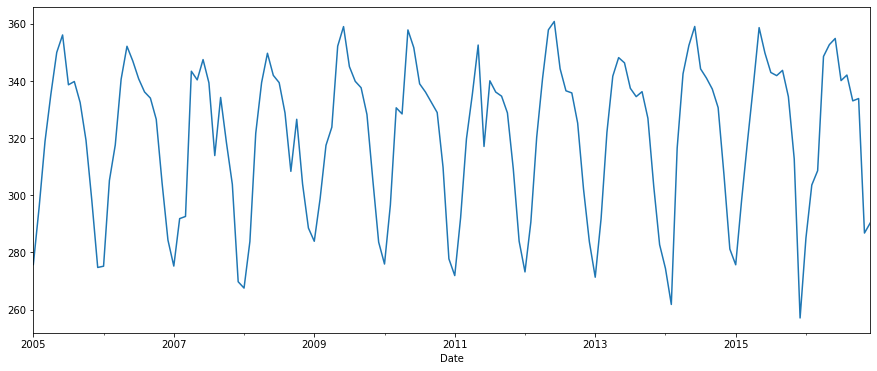

In [268]:
monthly_sales.plot(figsize=(15,6))
plt.show()

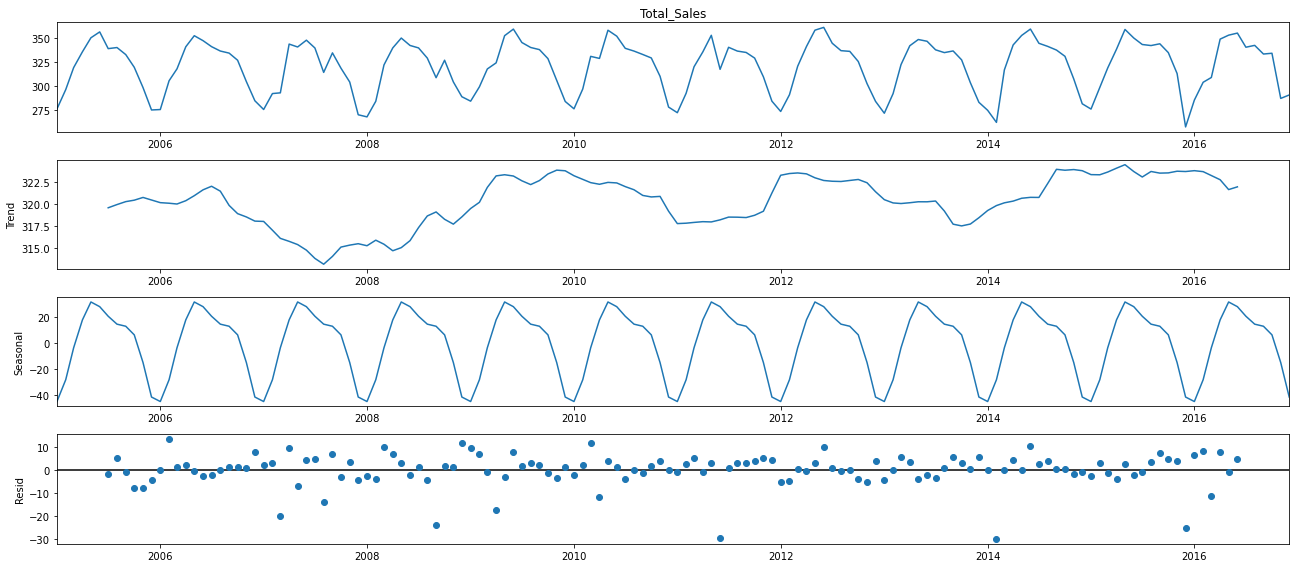

In [269]:
from pylab import rcParams
rcParams['figure.figsize']=18,8
decomposition=sm.tsa.seasonal_decompose(monthly_sales,model='additive')
fig=decomposition.plot()
plt.show()

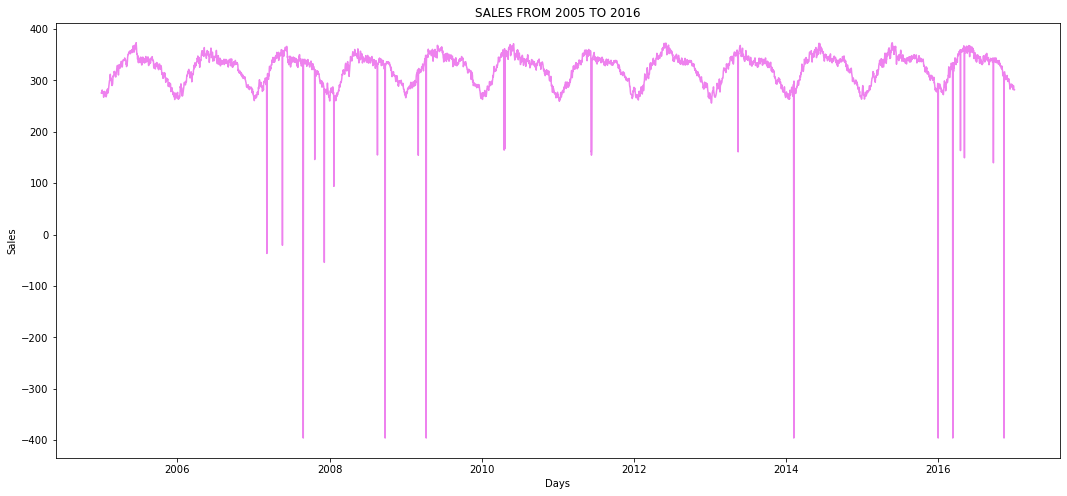

In [270]:
plt.plot(Sales_y, color = 'violet')
plt.title('SALES FROM 2005 TO 2016')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.show()

In [271]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
Sales_y=scaler.fit_transform(np.array(Sales_y).reshape(-1,1))

In [272]:
import pickle
pickle.dump(scaler,open("Scaler_forecast.pkl","wb"))

In [273]:
Sales_y.shape

(4383, 1)

In [274]:
training_size=int(len(Sales_y)*0.63)
test_size=len(Sales_y)-training_size
train_data,test_data=Sales_y[0:training_size,:],Sales_y[training_size:len(Sales_y),:1]

In [275]:
training_size,test_size

(2761, 1622)

In [276]:
train_data.shape

(2761, 1)

In [277]:
train_data

array([[0.87264457],
       [0.87264457],
       [0.87667316],
       ...,
       [0.96166342],
       [0.96920078],
       [0.97076023]])

In [278]:
def create_dataset(dataset, time_step=10):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        return np.array(dataX), np.array(dataY)

In [279]:
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [280]:
X_train

array([[0.87264457, 0.87264457, 0.87667316, 0.87758285, 0.88031189,
        0.87186485, 0.87238467, 0.87238467, 0.87576348, 0.87407407]])

In [281]:
print(X_train.shape),print(y_train.shape)

(1, 10)
(1,)


(None, None)

In [282]:
print(X_test.shape),print(ytest.shape)

(1, 10)
(1,)


(None, None)

In [283]:
X_train

array([[0.87264457, 0.87264457, 0.87667316, 0.87758285, 0.88031189,
        0.87186485, 0.87238467, 0.87238467, 0.87576348, 0.87407407]])

In [284]:
y_train

array([0.8705653])

In [285]:
X_test

array([[0.96673164, 0.96166342, 0.96036387, 0.95763483, 0.9568551 ,
        0.95620533, 0.95646524, 0.95022742, 0.95659519, 0.96790123]])

In [286]:
ytest

array([0.95815465])

In [287]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [288]:
X_train.shape[0],X_train.shape[1]

(1, 10)

In [289]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [290]:
model=Sequential()
model.add( LSTM(50,return_sequences=True,input_shape=(10,1)))

In [291]:
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

In [292]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [293]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=200,batch_size=64,verbose=1)

Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 0.7310 - val_loss: 0.7890
Epoch 2/200
1/1 [==============================] - 0s 28ms/step - loss: 0.6485 - val_loss: 0.6946
Epoch 3/200
1/1 [==============================] - 0s 34ms/step - loss: 0.5685 - val_loss: 0.5996
Epoch 4/200
1/1 [==============================] - 0s 33ms/step - loss: 0.4882 - val_loss: 0.5026
Epoch 5/200
1/1 [==============================] - 0s 26ms/step - loss: 0.4064 - val_loss: 0.4029
Epoch 6/200
1/1 [==============================] - 0s 64ms/step - loss: 0.3227 - val_loss: 0.3012
Epoch 7/200
1/1 [==============================] - 0s 32ms/step - loss: 0.2379 - val_loss: 0.2007
Epoch 8/200
1/1 [==============================] - 0s 35ms/step - loss: 0.1548 - val_loss: 0.1079
Epoch 9/200
1/1 [==============================] - 0s 28ms/step - loss: 0.0794 - val_loss: 0.0350
Epoch 10/200
1/1 [==============================] - 0s 33ms/step - loss: 0.0223 - val_loss: 5.4680e-04
Epoch 11/200
1/1 

1/1 [==============================] - 0s 27ms/step - loss: 1.9804e-08 - val_loss: 0.0016
Epoch 161/200
1/1 [==============================] - 0s 29ms/step - loss: 2.3011e-08 - val_loss: 0.0016
Epoch 162/200
1/1 [==============================] - 0s 32ms/step - loss: 1.9854e-08 - val_loss: 0.0016
Epoch 163/200
1/1 [==============================] - 0s 25ms/step - loss: 1.2423e-08 - val_loss: 0.0016
Epoch 164/200
1/1 [==============================] - 0s 35ms/step - loss: 4.8384e-09 - val_loss: 0.0016
Epoch 165/200
1/1 [==============================] - 0s 26ms/step - loss: 4.7591e-10 - val_loss: 0.0016
Epoch 166/200
1/1 [==============================] - 0s 34ms/step - loss: 5.9140e-10 - val_loss: 0.0016
Epoch 167/200
1/1 [==============================] - 0s 27ms/step - loss: 3.9020e-09 - val_loss: 0.0016
Epoch 168/200
1/1 [==============================] - 0s 26ms/step - loss: 7.7608e-09 - val_loss: 0.0016
Epoch 169/200
1/1 [==============================] - 0s 59ms/step - loss: 9.76

In [294]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [295]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [296]:
ytest[0:5]

array([0.95815465])

In [297]:
y_pred = model.predict(X_test,batch_size=1).sum(axis=1)

In [298]:
y_pred[0:5]

array([0.9184008], dtype=float32)

In [299]:
import math
from sklearn.metrics import mean_squared_error

In [300]:
math.sqrt(mean_squared_error(y_train,y_pred))

0.047835521925727376

In [301]:
math.sqrt(mean_squared_error(ytest,y_pred))

0.03975382180396725

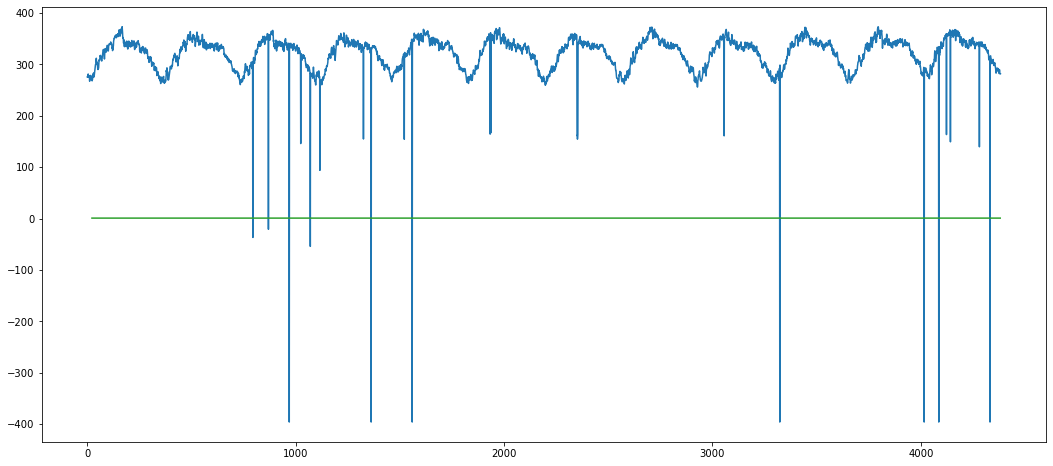

In [302]:
look_back=10
trainPredictPlot = np.empty_like(Sales_y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(y_pred)+look_back, :] = y_pred
testPredictPlot = np.empty_like(Sales_y)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_pred)+(look_back*2)+1:len(Sales_y)-1, :] = y_pred
plt.plot(scaler.inverse_transform(Sales_y))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [303]:
model.save("sales_forecast.h5")

In [304]:
len(Sales)

4383

In [305]:
Sales=np.array(Sales)

In [306]:
X_input=Sales[4372:4382].reshape(1,-1)
X_input.shape

(1, 10)

In [307]:
X_input

array([[291.2, 285.6, 285.3, 286.2, 282.3, 290. , 288.4, 283.3, 281.7,
        282. ]])

In [308]:
len(test_data)

1622

In [309]:
X_input=test_data[1612:].reshape(1,-1)
X_input.shape

(1, 10)

In [310]:
temp_input=list(X_input)
temp_input=temp_input[0].tolist()

In [311]:
temp_input

[0.8857699805068227,
 0.8853801169590643,
 0.8865497076023392,
 0.8814814814814814,
 0.8914879792072774,
 0.8894087069525665,
 0.8827810266406757,
 0.8807017543859649,
 0.8810916179337231,
 0.8809616634178037]

In [312]:
len(temp_input)

10